In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
courses = pd.read_csv('courses.csv')
students = pd.read_csv('students.csv')
nov = pd.read_csv('reg-month1.csv')
dec = pd.read_csv('reg-month2.csv')

matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [9]:
nov.head(5)

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9


In [10]:
courses.head()

,course_id,course_name,price
0,1,python,2499
1,2,sql,3499
2,3,data analysis,4999
3,4,machine learning,9999
4,5,tableau,2499


In [12]:
nov.head(2)

,student_id,course_id
0,23,1
1,15,5


In [13]:
dec.head(2)

,student_id,course_id
0,3,5
1,16,7


## Concat

In [18]:
# vertically stack nov and dec to find total registeration till dec
regs = pd.concat([nov , dec],ignore_index=True)
regs.head()

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9


In [20]:
# you can do the same using append method
nov.append(dec,ignore_index=True).head(5)

C:\Users\vinay\AppData\Local\Temp\ipykernel_11736\3279871658.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nov.append(dec,ignore_index=True).head(5)


,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9


In [24]:
#wht if you want to keep original index
multi = pd.concat([nov,dec] , keys = ['Nov', 'Dec'])   #--> Multi Index dataframe
multi

student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [26]:
# accessing multi-based
print(multi.loc['Nov'].head())#---> Data with the label name nov
print("*"*20)
print(multi.loc[("Nov" , 0)]) #---> accessing index in the nov data

   student_id  course_id
0          23          1
1          15          5
2          18          6
3          23          4
4          16          9
********************
student_id    23
course_id      1
Name: (Nov, 0), dtype: int64


In [29]:
# stacking df horizontally
pd.concat([nov , dec] , axis = 1).head()

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9


## Merge/ Join
- Two tables are joined together based on common column

In [34]:
regs.head(2)
# requirement: we need to display the student name too.

,student_id,course_id
0,23,1
1,15,5


In [39]:
students.head(2)

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1


### Inner Join

In [48]:
pd.merge(students,regs ,  on='student_id', how='inner')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


this is called `**Inner Join**`In inner join the items will only be merged when the common column elements are same in both the tables , else you will lose the information

There are different types of joins: 
- open merge notebook of nitish sir , and lool for the screenshot for different types of joins

### Left Join
- will contain all the data of left even if in the common column the data is not present , it would still include all items of left column

In [50]:
pd.merge(courses , regs , how = 'left' , on = 'course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


In [51]:
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})

students = pd.concat([students,temp_df],ignore_index=True)
# adding more students who didn't enrolled into any course

### Right Join

In [54]:
pd.merge(students , regs , how = 'right' , on = 'student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


**1.Find total revenue generated?**

In [64]:
pd.merge(regs , courses , how = 'inner' , on = 'course_id')['price'].sum()

154247

**2. Find Month by Month Revenue?**

In [69]:
pd.concat([nov , dec],keys = ['Nov', 'Dec']).head()

student_id  course_id
Nov 0          23          1
    1          15          5
    2          18          6
    3          23          4
    4          16          9

In [76]:
pd.concat([nov , dec],keys = ['Nov', 'Dec']).reset_index().sample(5)

,level_0,level_1,student_id,course_id
43,Dec,18,22,5
25,Dec,0,3,5
49,Dec,24,11,10
13,Nov,13,11,7
33,Dec,8,17,10


In [74]:
pd.concat([nov , dec],keys = ['Nov', 'Dec']).reset_index().merge(courses , on = 'course_id').groupby('level_0')['price'].sum()

level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

**3. Print the registration table**
- cols -> name -> course -> price

In [83]:
regs.merge(students , on = 'student_id').merge(courses , on = 'course_id')[['name' , 'course_name' , 'price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,python,2499
2,Fardeen Mahabir,python,2499
3,Kailash Harjo,python,2499
4,Seema Kota,python,2499
5,Shashank D’Alia,python,2499
6,Radha Dutt,python,2499
7,Pranab Natarajan,python,2499
8,Chhavi Lachman,machine learning,9999
9,Qabeel Raman,machine learning,9999


**4. Plot bar chart for revenue/course**

In [93]:
courses.merge(regs , on = 'course_id' , how = 'inner').groupby('course_name')['price'].sum()

course_name
data analysis       24995
machine learning    39996
ms sxcel             7995
pandas               4396
plotly               3495
power bi            11394
pyspark             14994
python              22491
sql                  6998
tableau             17493
Name: price, dtype: int64

<Axes: xlabel='course_name'>

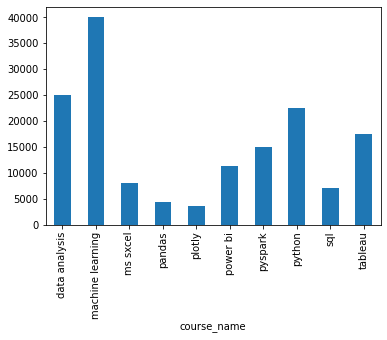

In [92]:
courses.merge(regs , on = 'course_id' , how = 'inner').groupby('course_name')['price'].sum().plot(kind = 'bar')

**5. find students who enrolled in both the months?**

In [95]:
#find the student id in nov and dec , then do intersection 
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23], dtype=int64)

In [96]:
students[students['student_id'].isin(common_student_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [97]:
# 6. find course that got no enrollment
# courses['course_id']
# regs['course_id']

course_id_list = np.setdiff1d(courses['course_id'],regs['course_id'])
courses[courses['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [99]:
# 7. find students who did not enroll into any courses
student_id_list = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(student_id_list)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,17


In [100]:
# 8. Print student name -> partner name for all enrolled students
# self join
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey
